# ARIMA Model for Time Series Forecasting

A Time Series is defined as a series of data points indexed in time order. The time order can be daily, monthly, or even yearly. Given below is an example of a Time Series that illustrates the number of passengers of an airline per month from the year 1949 to 1960.

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

Some Use Cases
    To predict the number of incoming or churning customers.
    To explaining seasonal patterns in sales.
    To detect unusual events and estimate the magnitude of their effect.
    To Estimate the effect of a newly launched product on number of sold units.

Components of a Time Series:
1) Trend:The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
2) Seasonality:The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.
3) Cyclical Component: These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
4) Irregular Variation: These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition
ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import product
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
  
# Read the AirPassengers dataset 
data = pd.read_csv('Data\international-airline-passengers.csv', index_col ='Month', parse_dates = True) 

# Print the first five rows of the dataset 
data.head() 

In C:\Users\abhui\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhui\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhui\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\abhui\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhui\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#Check if the series is stationary
Let’s perform the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not.

In [2]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


Since P-value is greater than the significance level,the data isn't stationary and we can plot ACF and PACF to confirm nonstationarity of the data.


and we need to make it a stationary series first to implement ARIMA. 

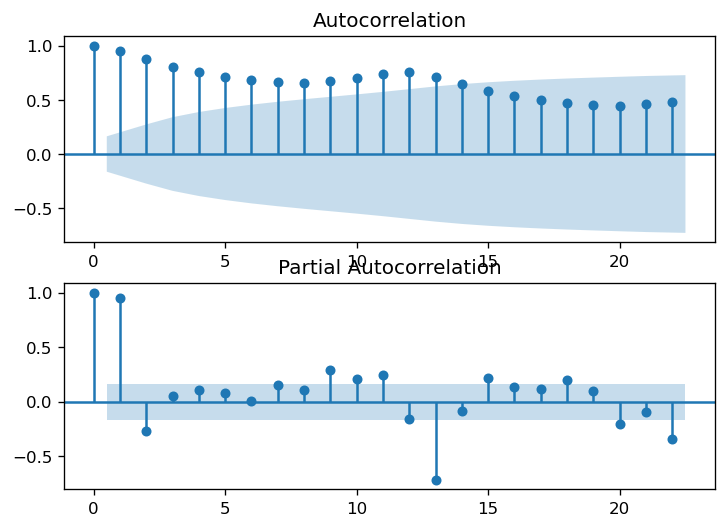

In [3]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':120})
fig, axes = plt.subplots(2)

plot_acf(data, ax=axes[0])
plot_pacf(data, ax=axes[1])

plt.show()

ACF is decaying upto period 12 and PACF has component repeating at interval of 12 indicating seasonality. PACF decreases substantially below lag 2 and ACF is decaying - indicating AR process.

In [4]:
# ETS Decomposition 
result = seasonal_decompose(data['#Passengers'], model ='multiplicative') 

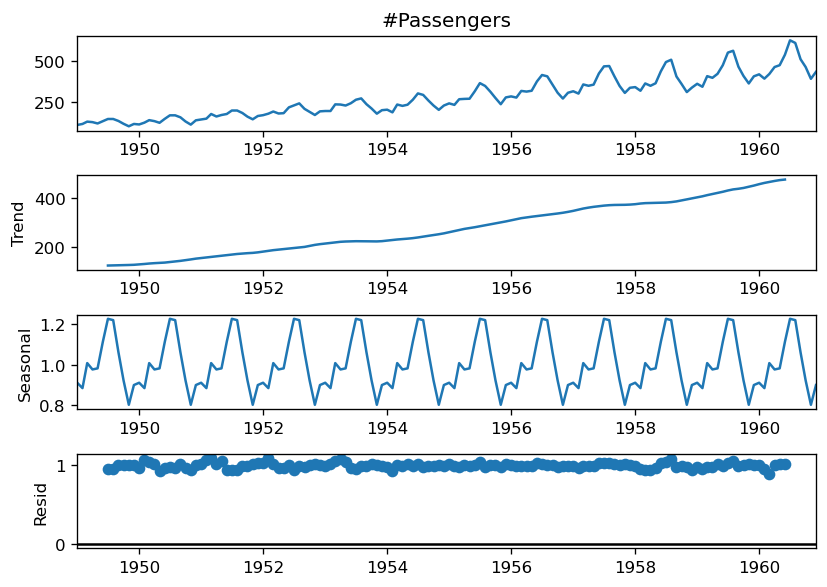

In [5]:
# ETS plot  
result.plot(); 

ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).

AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.
Types of ARIMA Model

ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
SARIMA:Seasonal ARIMA
SARIMAX:Seasonal ARIMA with exogenous variables
Pyramid Auto-ARIMA

The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [6]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(data['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 5, max_q = 5, d = None,
                          start_P = 1, start_Q = 1, max_P = 5, max_Q = 5, D=None,
                          seasonal = True,  m=12, #periodicity of season is twelve months                          
                          trace = True, # show the iteration
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.25 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.33 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.40 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.27 sec
 ARIMA(0,1,1)(1,1,0)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 19 Feb 2021   AIC                           1019.178
Time:                                     15:31:02   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now that we know the best model from above as selected by the auto_arima function, we will use the model to test the model.

In [7]:
# Split data into train / test sets 
train = data.iloc[:len(data)-12] 
test = data.iloc[len(data)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 0, 12) on the training set as shown in the simulation above  
model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 0, 12)) 

  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Fri, 19 Feb 2021   AIC                            901.659
Time:                                     15:31:06   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2408     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

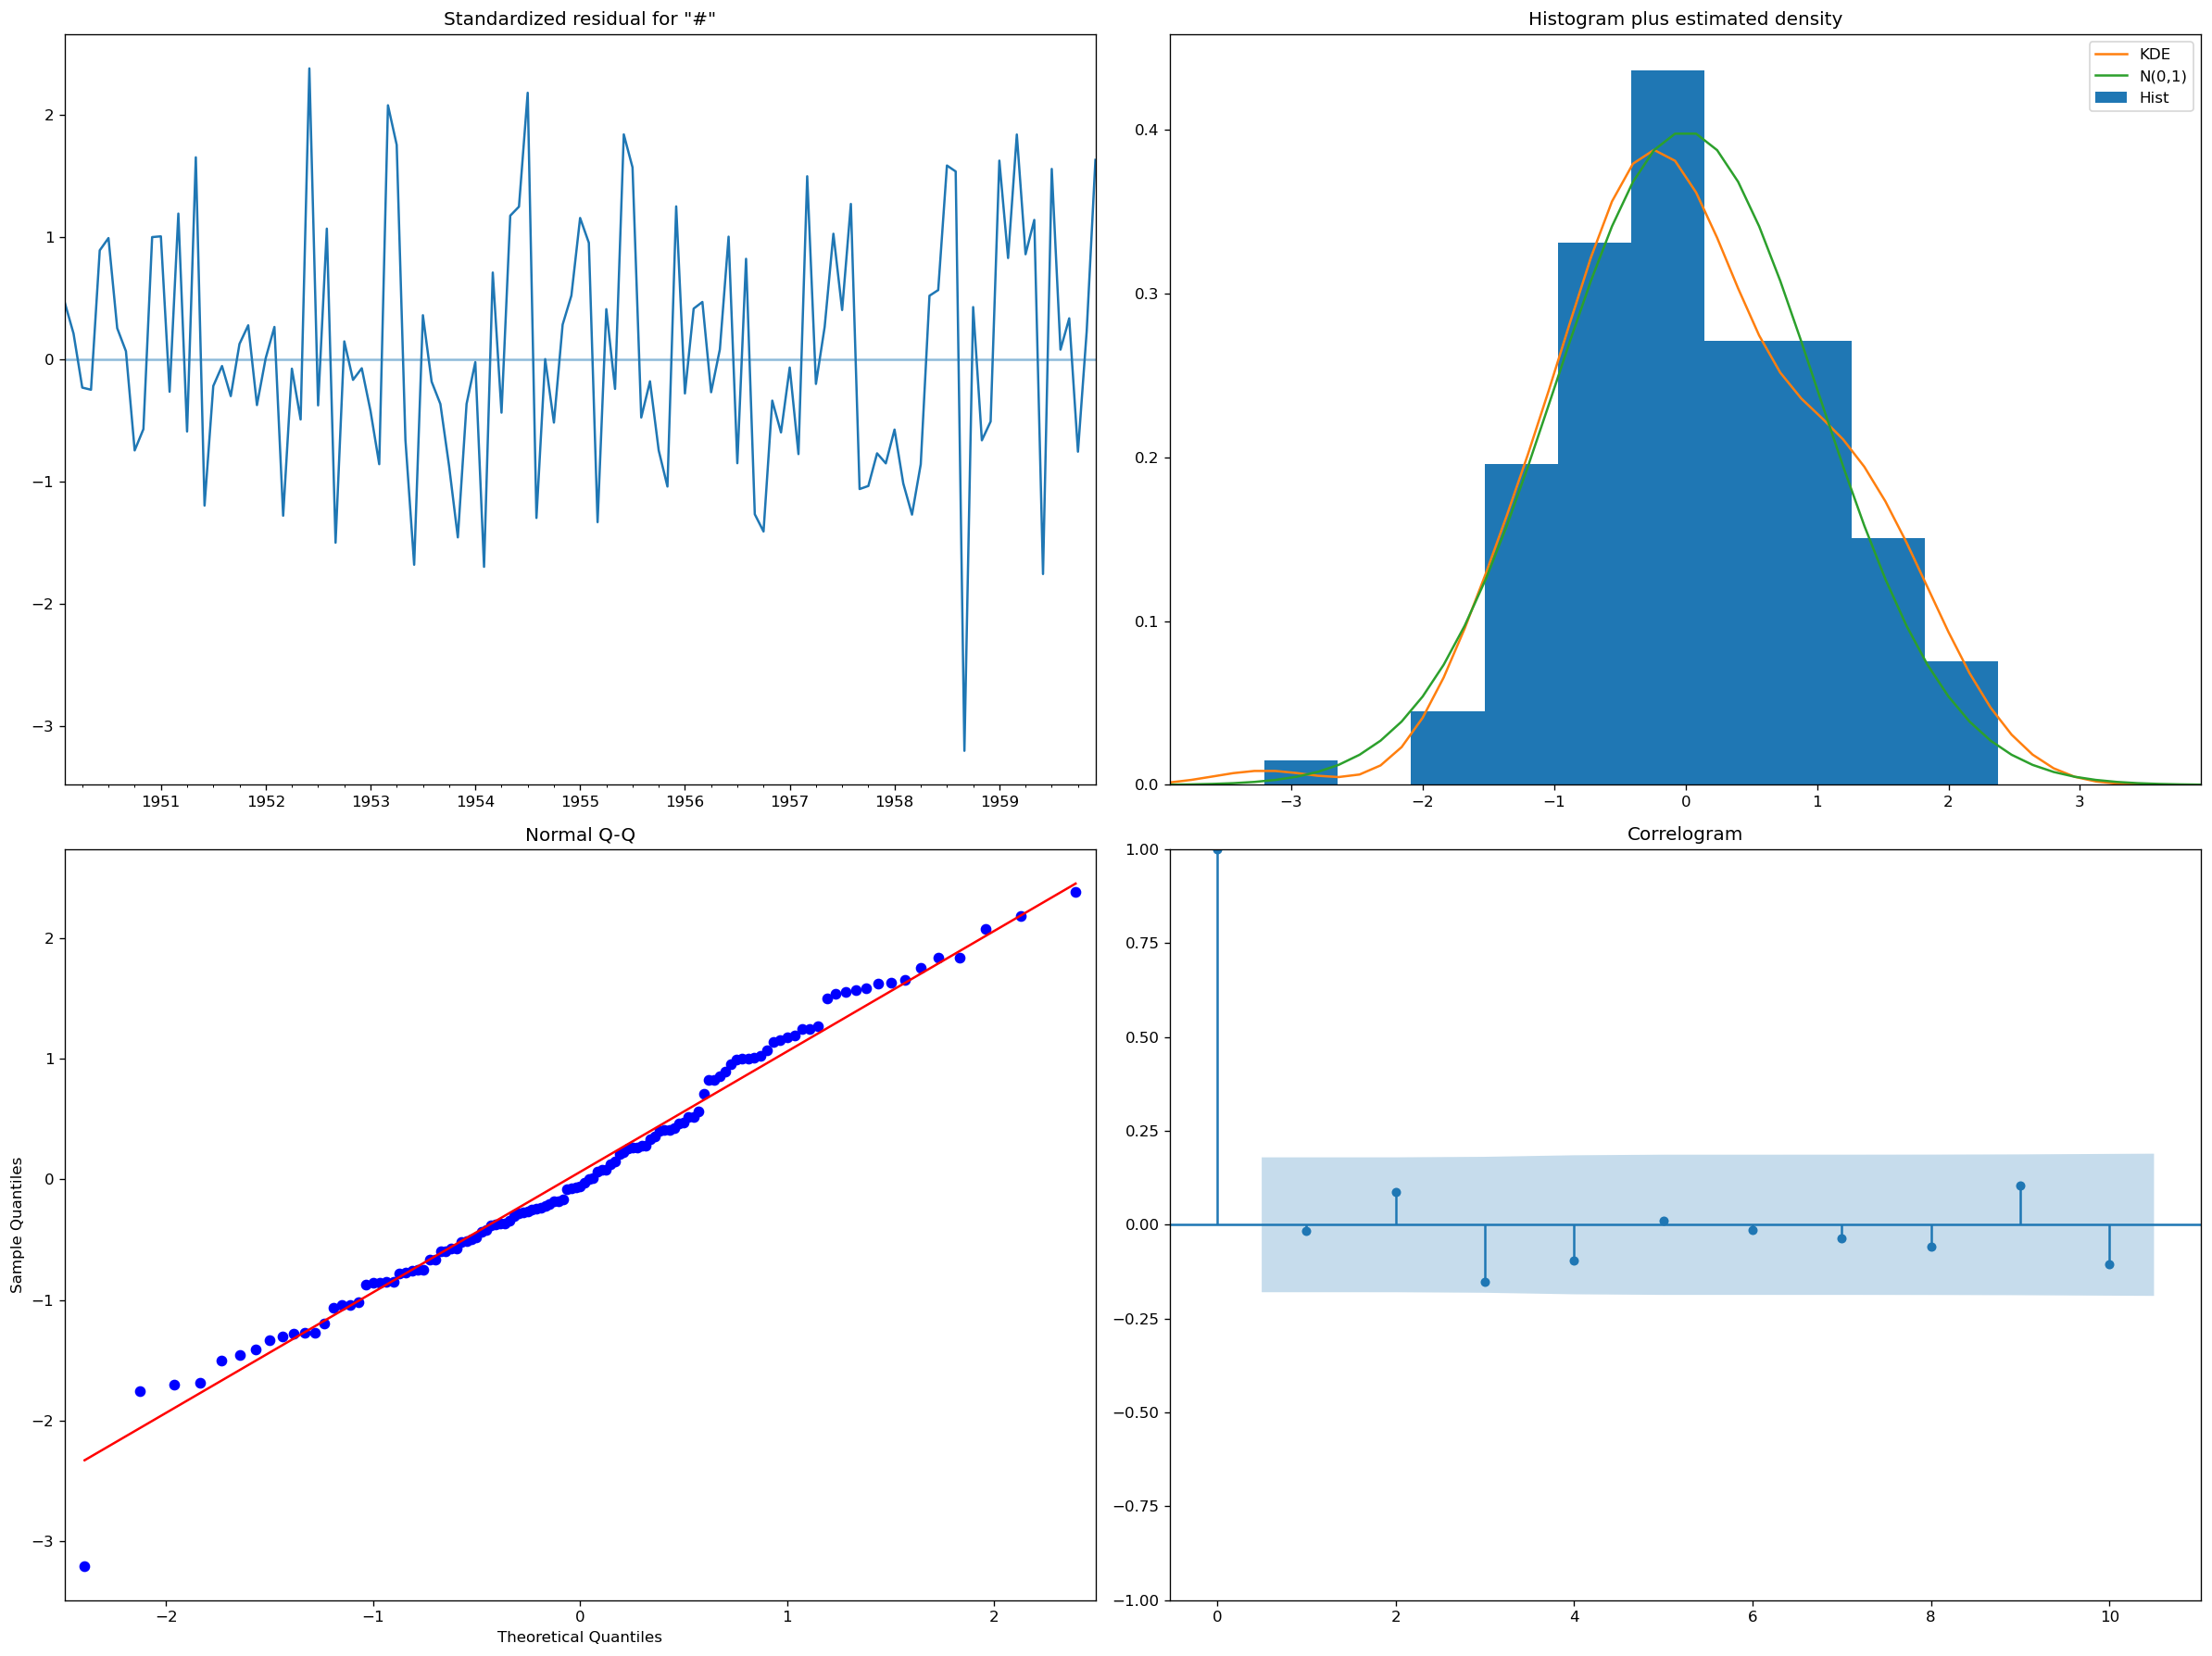

In [8]:
result.plot_diagnostics(figsize=(20,15))
plt.tight_layout();

#Predictions of ARIMA Model against the test set

#Plot shows pretty norma as there are correlation component and most of the data lies on the Q-Q line. We can also plot the residuals to further verify the model. Diagnostic plots provides the same information as the residual plot.

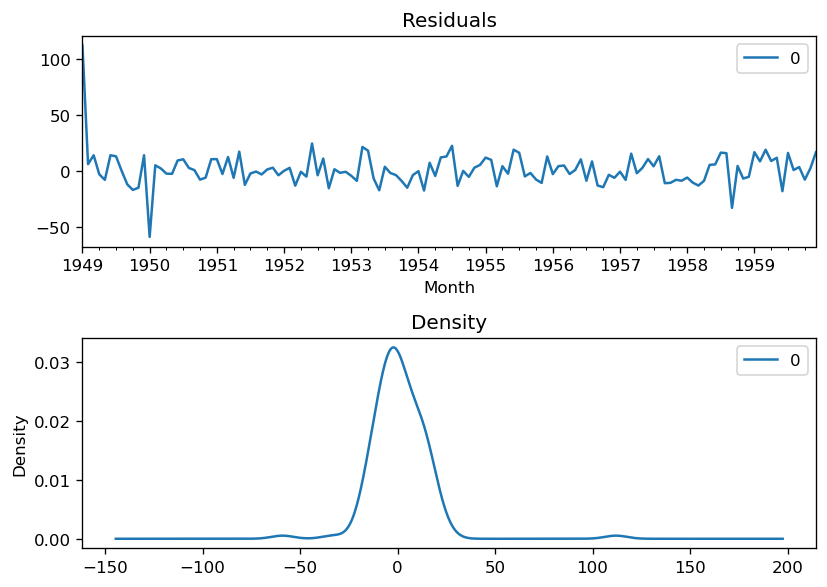

In [9]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Month'>

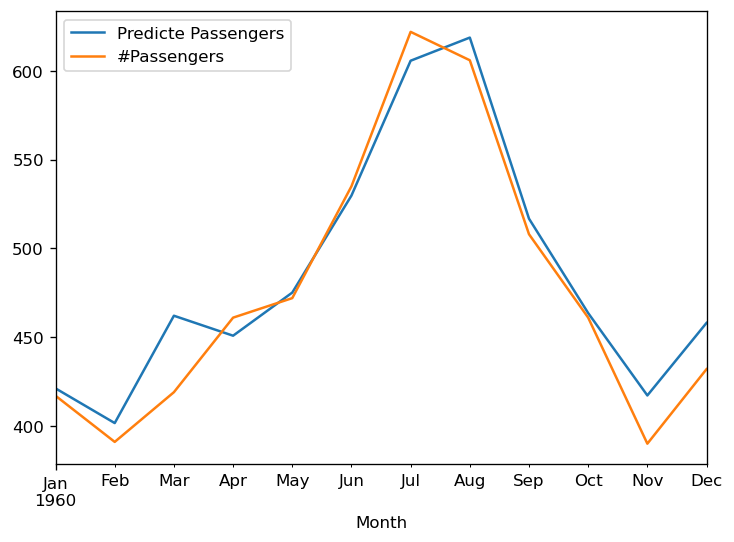

In [10]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions= result.predict(start, end, typ = 'levels').rename("Predicte Passengers")

# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 

Plot above shows that residual is normally distributed (zero mean and uniform variance); therefore, model parameters are valid.

Now Evaluate the model using MSE and RMSE

In [11]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["#Passengers"], predictions) 

18.38077783779086

In [12]:
# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 

337.85299392222356

In [13]:
#Maximum absolute percentage error
mape = np.mean(np.abs(test["#Passengers"] - predictions) / np.abs(test["#Passengers"]))

print(f'MAPE: {round(mape * 100, 2)}%')

MAPE: 3.15%


Forecast using ARIMA Model

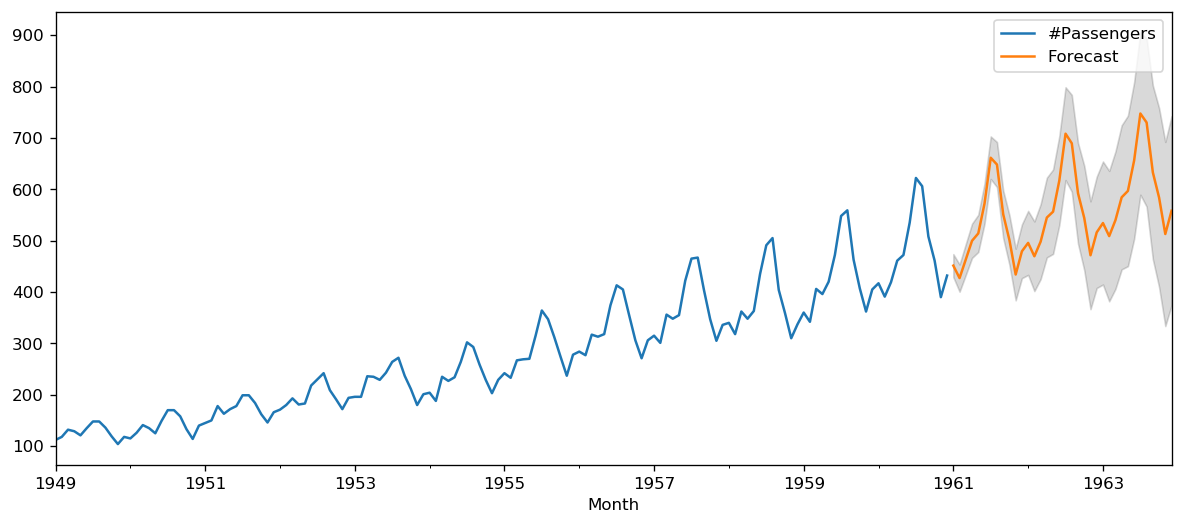

In [14]:
# Train the model on the full dataset 
model = SARIMAX(data['#Passengers'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 

#confidence interval of the mean
confint = (result.get_forecast(36)).conf_int()
lower_ci = confint['lower #Passengers']
upper_ci = confint['upper #Passengers']
  
# Plot the forecast values 
data['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)
plt.fill_between(lower_ci.index, lower_ci, upper_ci, color='k', alpha=.15)

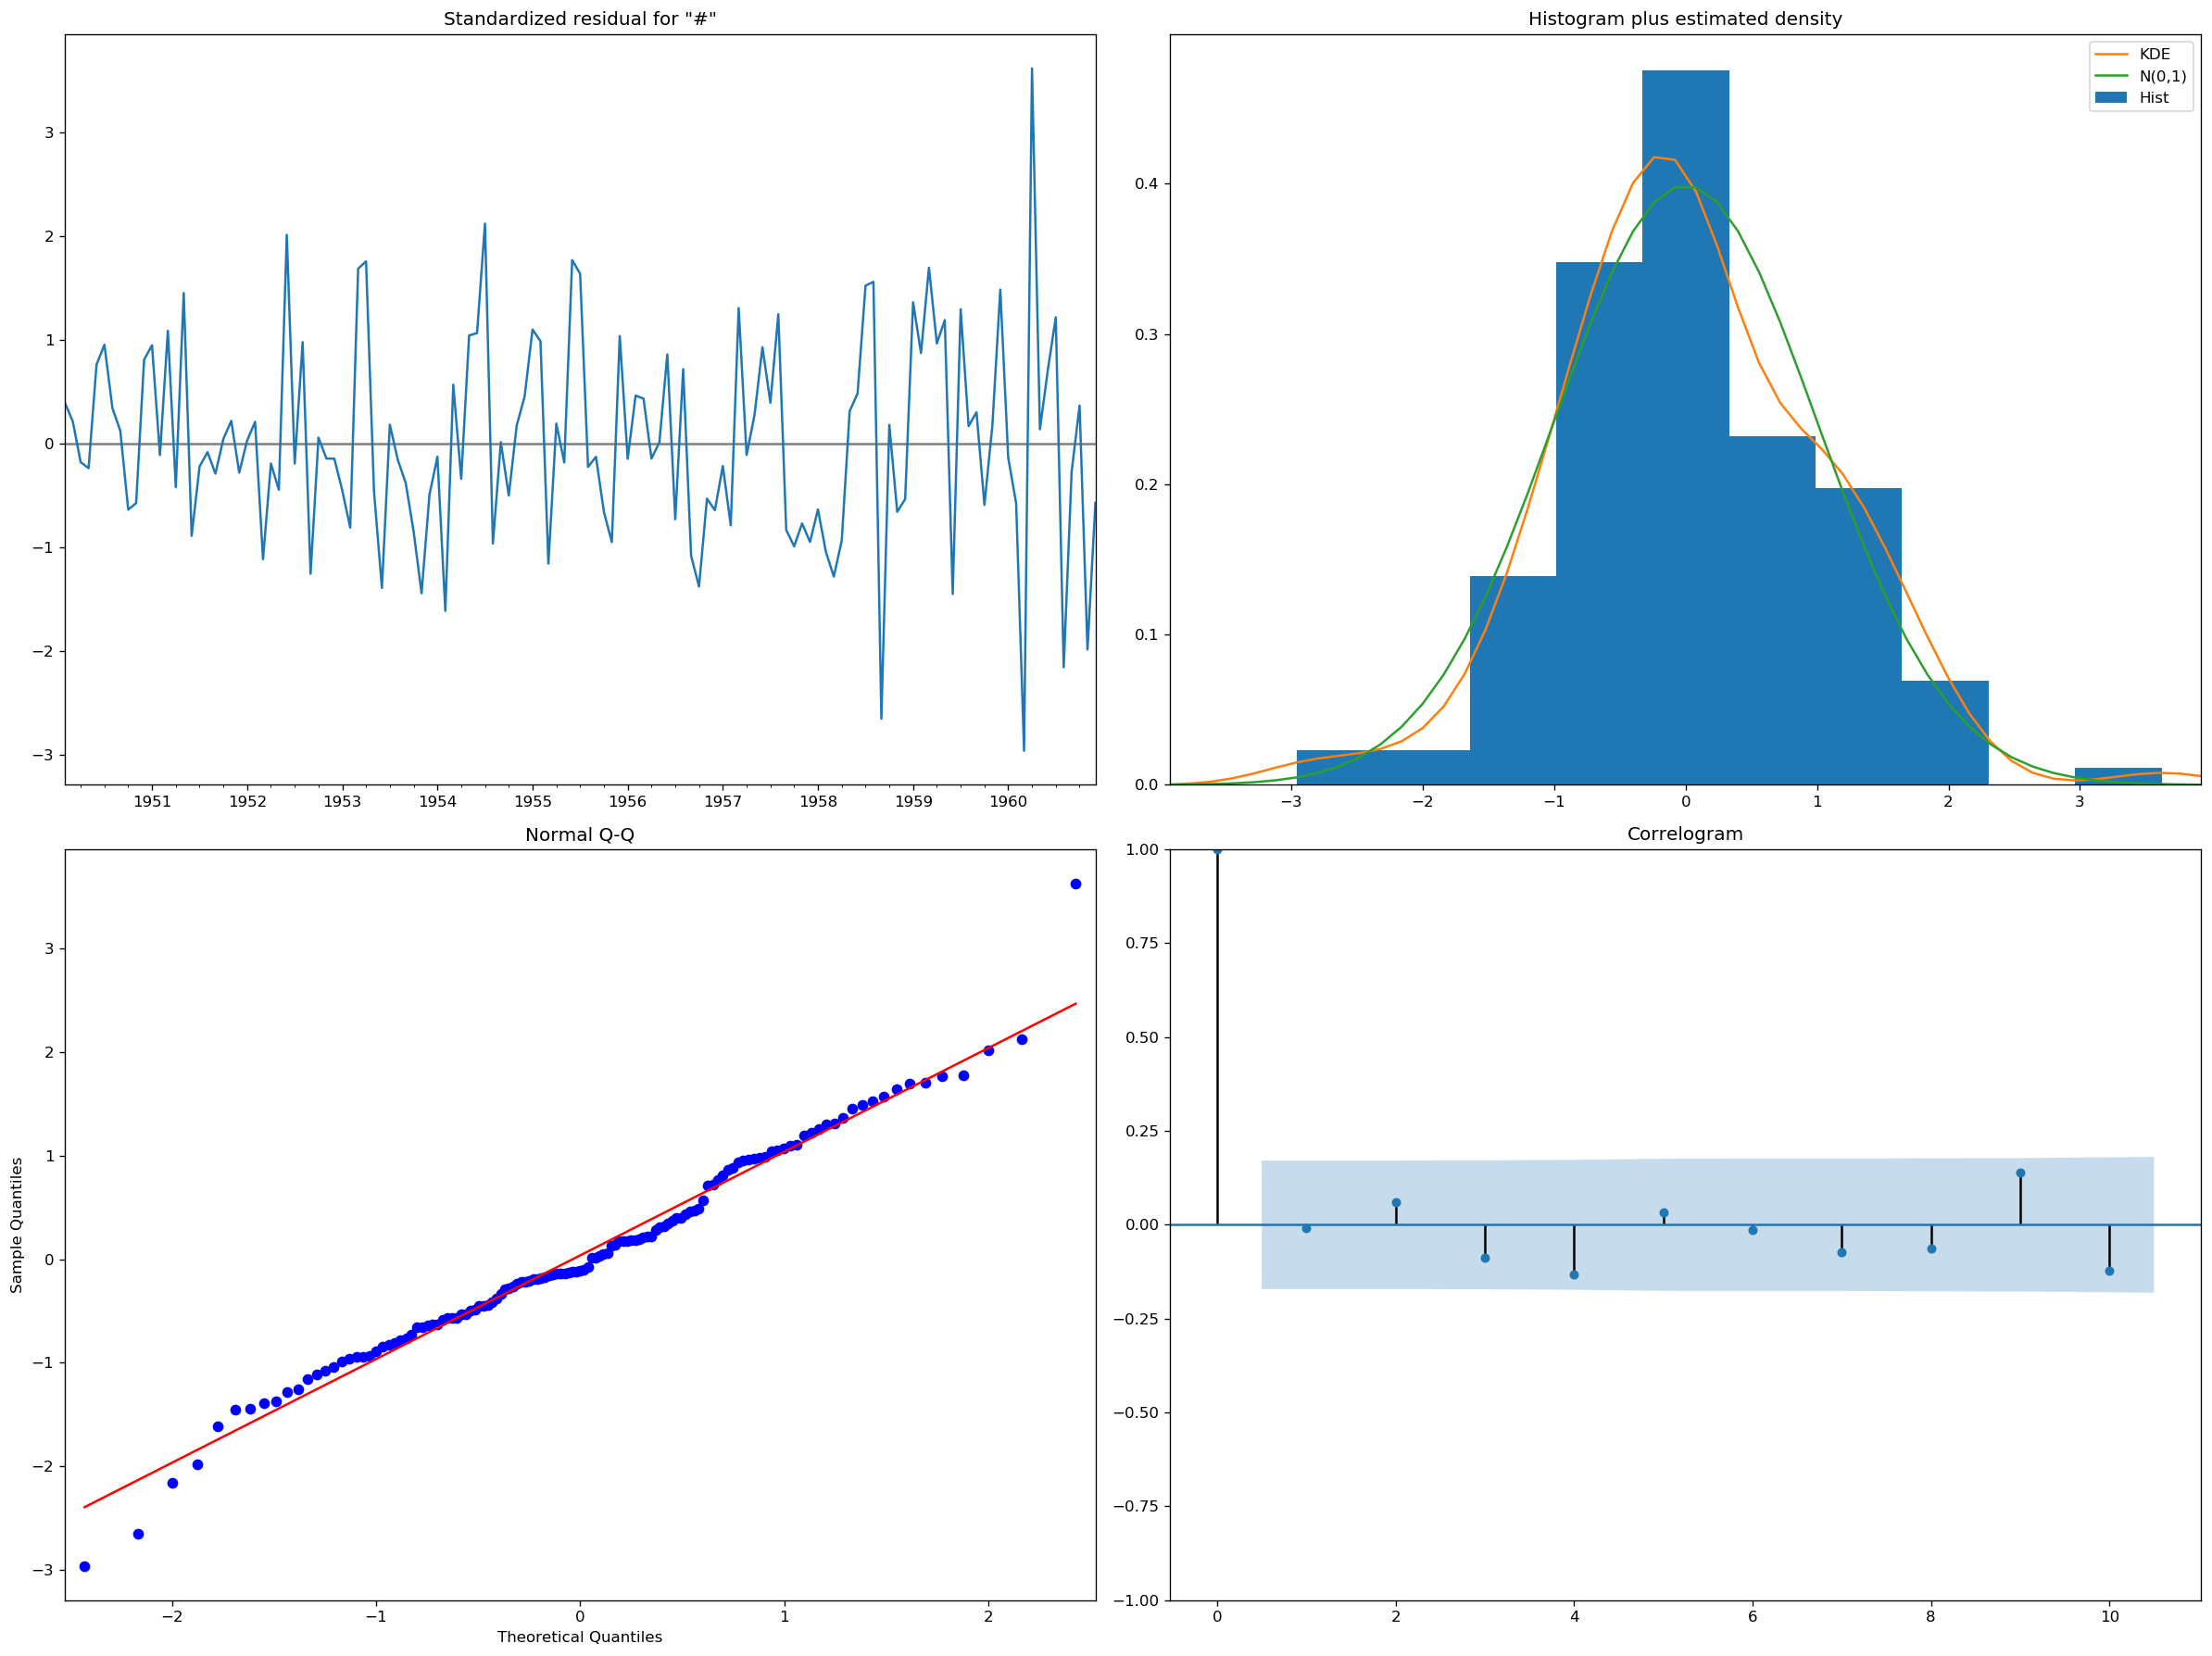

In [15]:
result.plot_diagnostics(figsize=(20,15))
plt.tight_layout();

Plot above shows that residual is normally distributed and correlation component in correlogram. Standard deviation increases as the prediction period increases as expected.

Example of SARIMA selection using another method

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


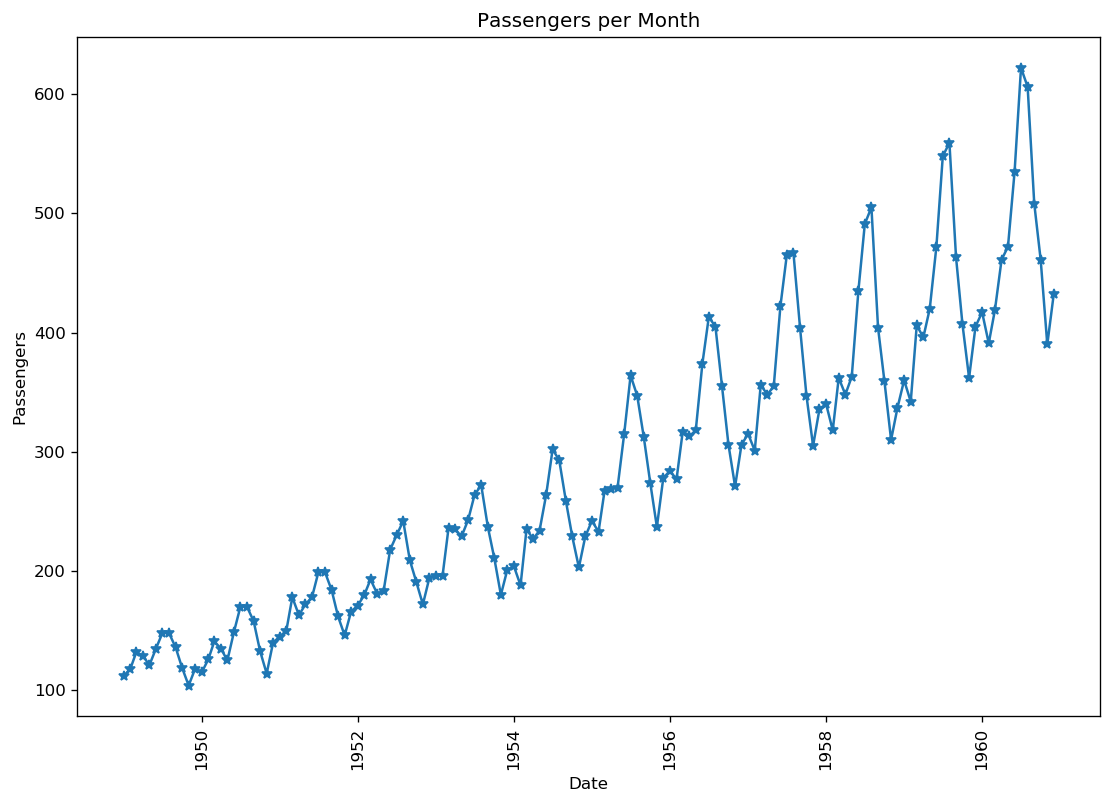

In [17]:
plt.rcParams['figure.figsize'] = [11, 7.5]

plt.plot(data.index, data['#Passengers'], marker='*')
plt.title('Passengers per Month')
plt.ylabel('Passengers')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

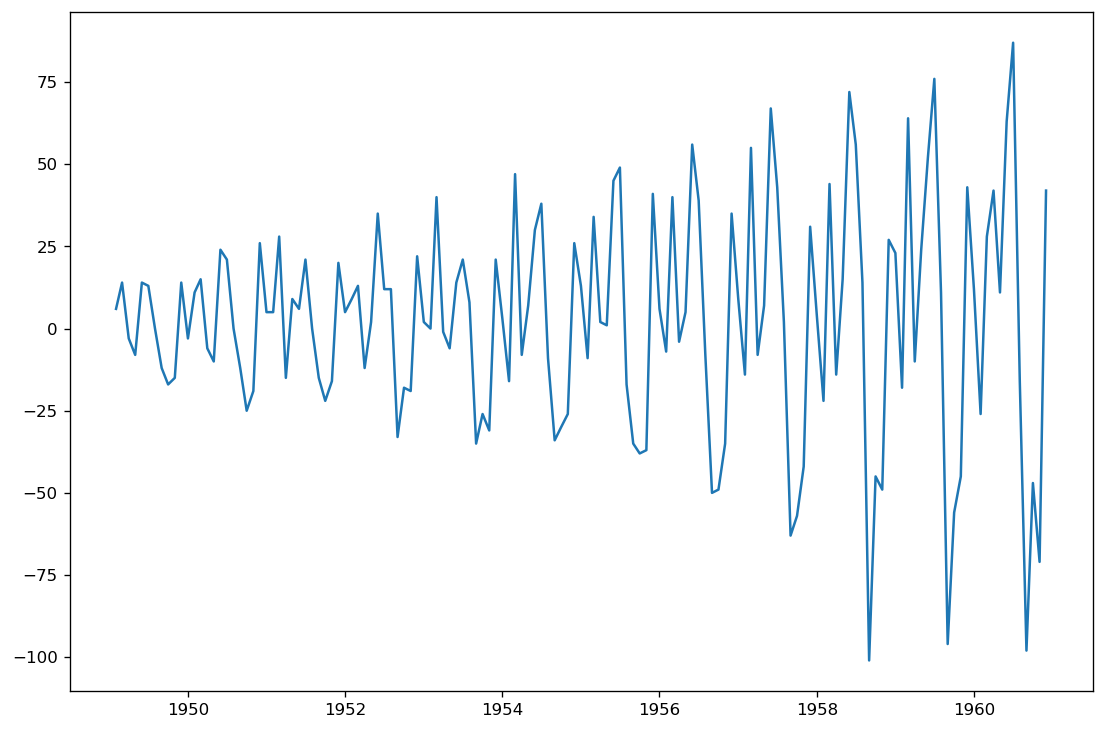

In [18]:
#Difference of 1 to remove the linear trend
data['data_tr_1'] = data.diff(1)
plt.plot(data['data_tr_1'])[1:];

Linear difference removed the linearity but we can difference with period of 12 to remove the seasonality. Varaince, however, is not constant.

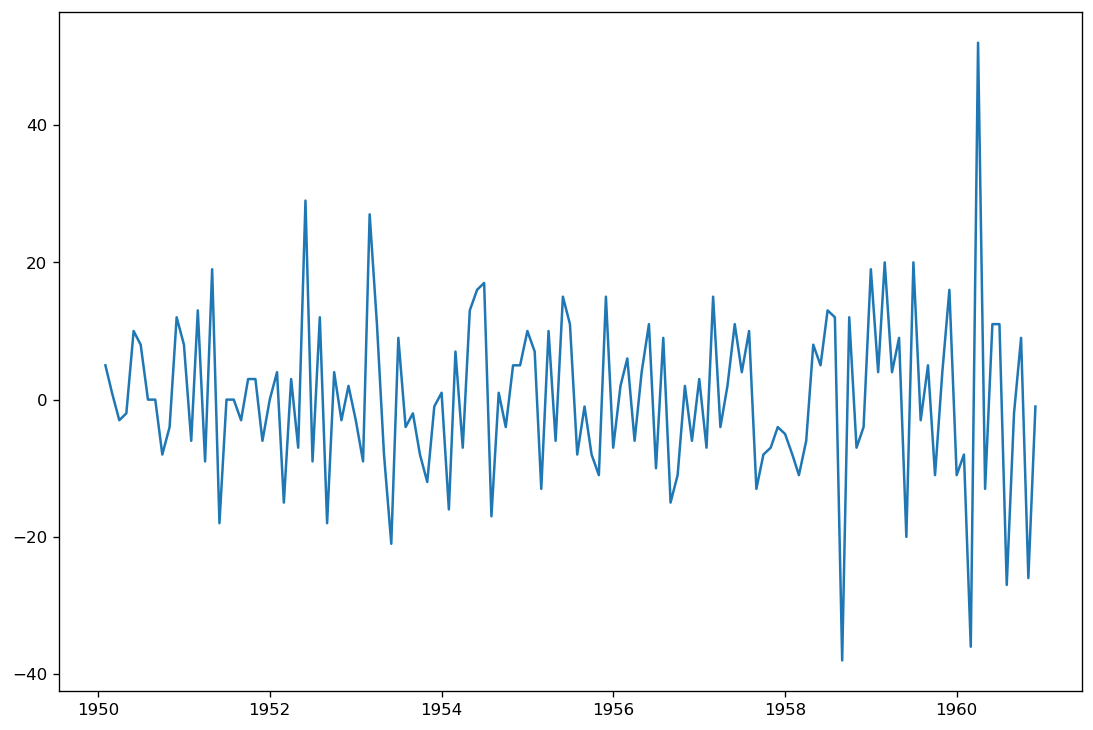

In [19]:
#Difference of 12 to remove the seasonality
data['data_tr_2'] = data['data_tr_1'].diff(12)
plt.plot(data['data_tr_2'])[13:];

Seasonality is removed but variance is not constant i.e. may not be stationary. We will AD Fuller test to check stationarity

In [20]:
ad_fuller_result = adfuller(data['data_tr_2'][13:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.595618083746334
p-value: 1.8565116001234708e-28


P-value is less than .05 indicating stationarity. We can plot ACF and PACF to confirm the stationarity. 

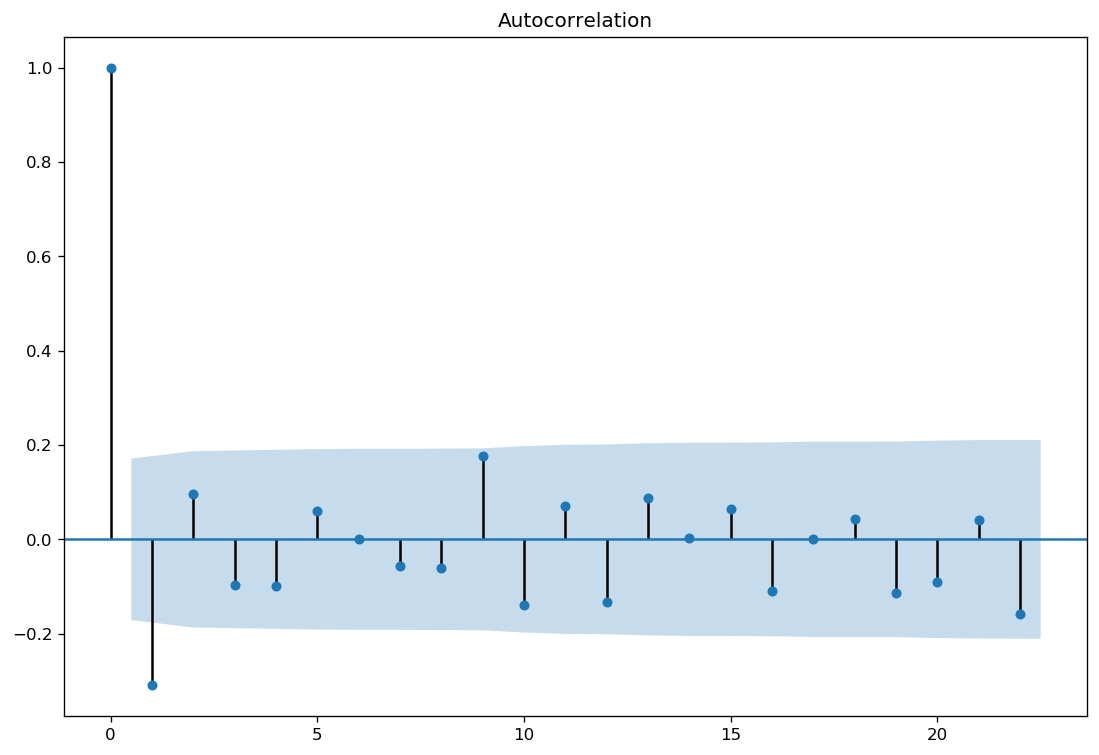

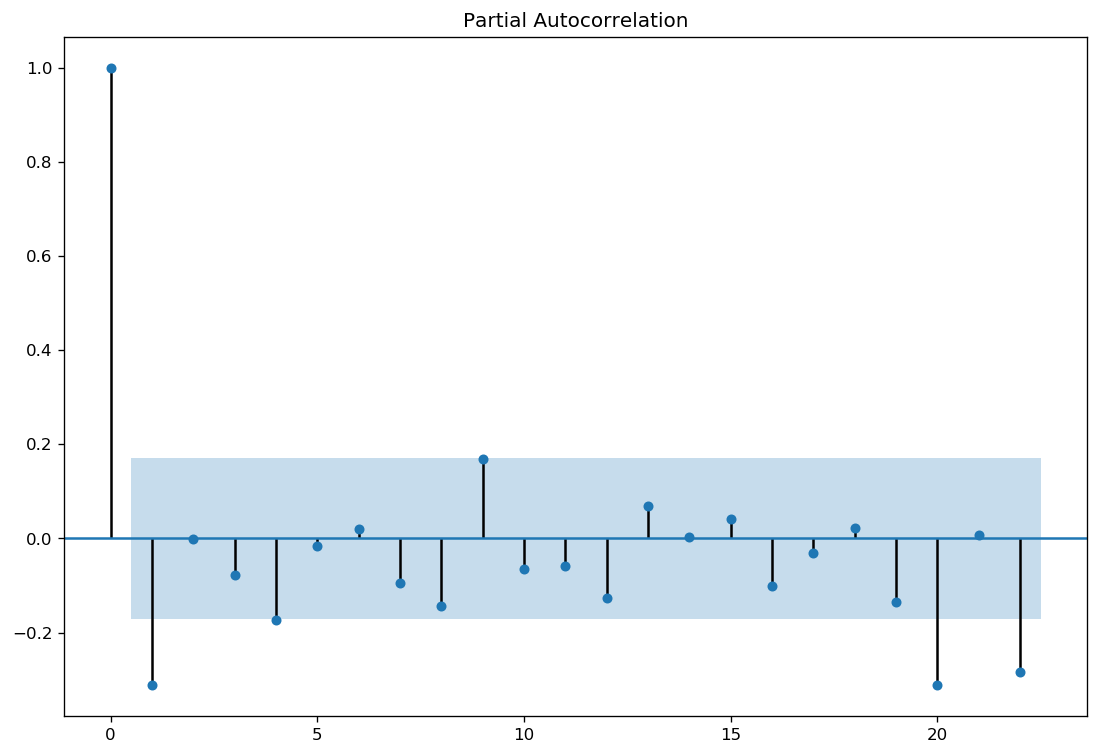

In [21]:
plot_acf(data['data_tr_2'][13:])
plot_pacf(data['data_tr_2'][13:]);

ACF and PACF shows that transformed data has no time dependence.

In [22]:
def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        endog - the observed variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(endog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [23]:
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
s = 12

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

81
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 1, 0), (0, 0, 1, 1)]


In [24]:
result_df = optimize_SARIMA(data['#Passengers'], parameters_list, 1, 1, 12)
result_df

,"(p,q)x(P,Q)",AIC
0,"(2, 1, 1, 2)",1012.085000
1,"(1, 2, 1, 2)",1012.390364
2,"(1, 2, 2, 2)",1012.718870
3,"(0, 1, 1, 2)",1012.990796
4,"(2, 1, 2, 1)",1013.102353
...,...,...
75,"(0, 0, 2, 0)",1032.120286
76,"(0, 0, 1, 1)",1032.127619
77,"(0, 0, 0, 2)",1032.275996
78,"(0, 0, 2, 2)",1033.262352


In [25]:
best_model = SARIMAX(data['#Passengers'], order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                        SARIMAX Results                                        
Dep. Variable:                             #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -499.043
Date:                                 Fri, 19 Feb 2021   AIC                           1012.085
Time:                                         13:10:21   BIC                           1032.211
Sample:                                     01-01-1949   HQIC                          1020.263
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5266      0.080      6.587      0.000       0.370       0

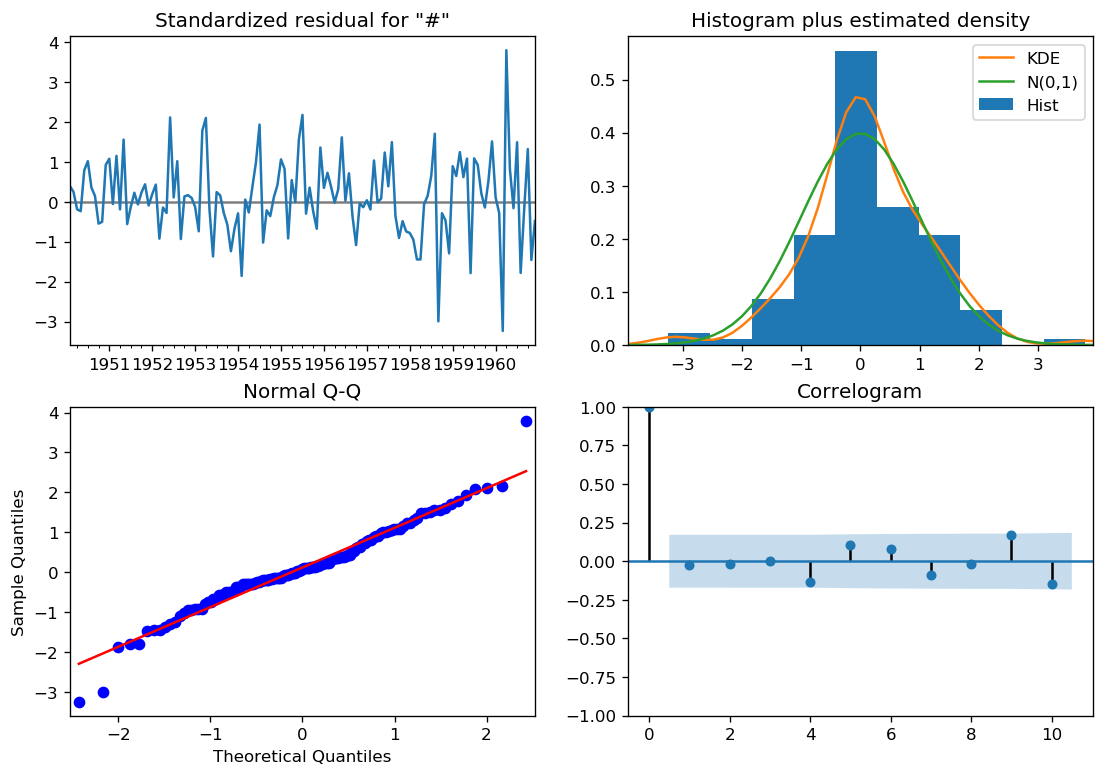

In [26]:
res.plot_diagnostics();

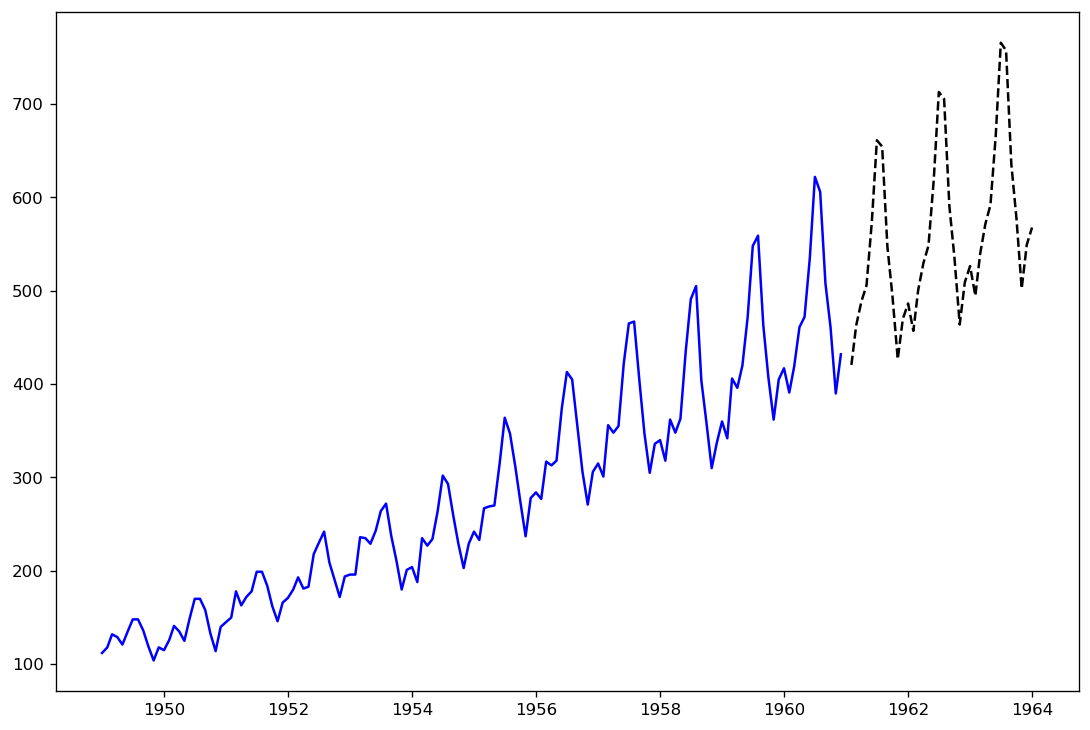

In [27]:
n_forecast = 36
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

plt.plot(data['#Passengers'], 'blue')
plt.plot(predict.predicted_mean[-n_forecast:], 'k--')


In [28]:
data['model'] = predict.predicted_mean
data

,#Passengers,data_tr_1,data_tr_2,model
Month,,,,
1949-01-01,112,NaN,NaN,0.000000
1949-02-01,118,6.0,NaN,111.996576
1949-03-01,132,14.0,NaN,118.000393
1949-04-01,129,-3.0,NaN,131.998674
1949-05-01,121,-8.0,NaN,129.000241
...,...,...,...,...
1960-08-01,606,-16.0,-27.0,624.686817
1960-09-01,508,-98.0,-2.0,509.833546
1960-10-01,461,-47.0,9.0,447.204085


In [29]:
mse = mean_squared_error(data['#Passengers'][132:], data['model'][132:])
print(f'MSE: {mse}')

MSE: 321.55458085102686


In [30]:
#Maximum absolute percentage error
mape = np.mean(np.abs(data["#Passengers"][132:] - data['model'][132:]) / np.abs(data["#Passengers"][132:]))

print(f'MAPE: {round(mape * 100, 2)}%')

MAPE: 2.83%


In [31]:
# Fit a SARIMAX(2, 1, 1)x(1, 1, 2, 12) on the training set as shown in the simulation above  
model = SARIMAX(train['#Passengers'],  
                order = (2, 1, 1),  
                seasonal_order =(1, 1, 2, 12)) 

  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                             #Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -439.123
Date:                                 Fri, 19 Feb 2021   AIC                            892.246
Time:                                         13:10:40   BIC                            911.700
Sample:                                     01-01-1949   HQIC                           900.146
                                          - 12-01-1959                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2663      0.085    -14.969      0.000      -1.432      -1.100
ar.L2         -0.3406      0.077     -4.408      0.000      -0.492      -0.189
ma.L1          0.9994      0.299      3.345      0.001       0.414       1.585
ar.S.L12       0.9986      0.110      9.105      0.000       0.784       1.214
ma.S.L12      -1.3290      1.418     -0.937      0.349      -4.108       1.450
ma.S.L24       0.3555      0.427      0.833      0.405      -0.481       1.192
sigma2        78.9346    101.068      0.781      0.435    -119.155     277.024
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.81   Prob(JB):                         0.64
Heteroskedasticity (H):               1.56   Skew:                            -0.08
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

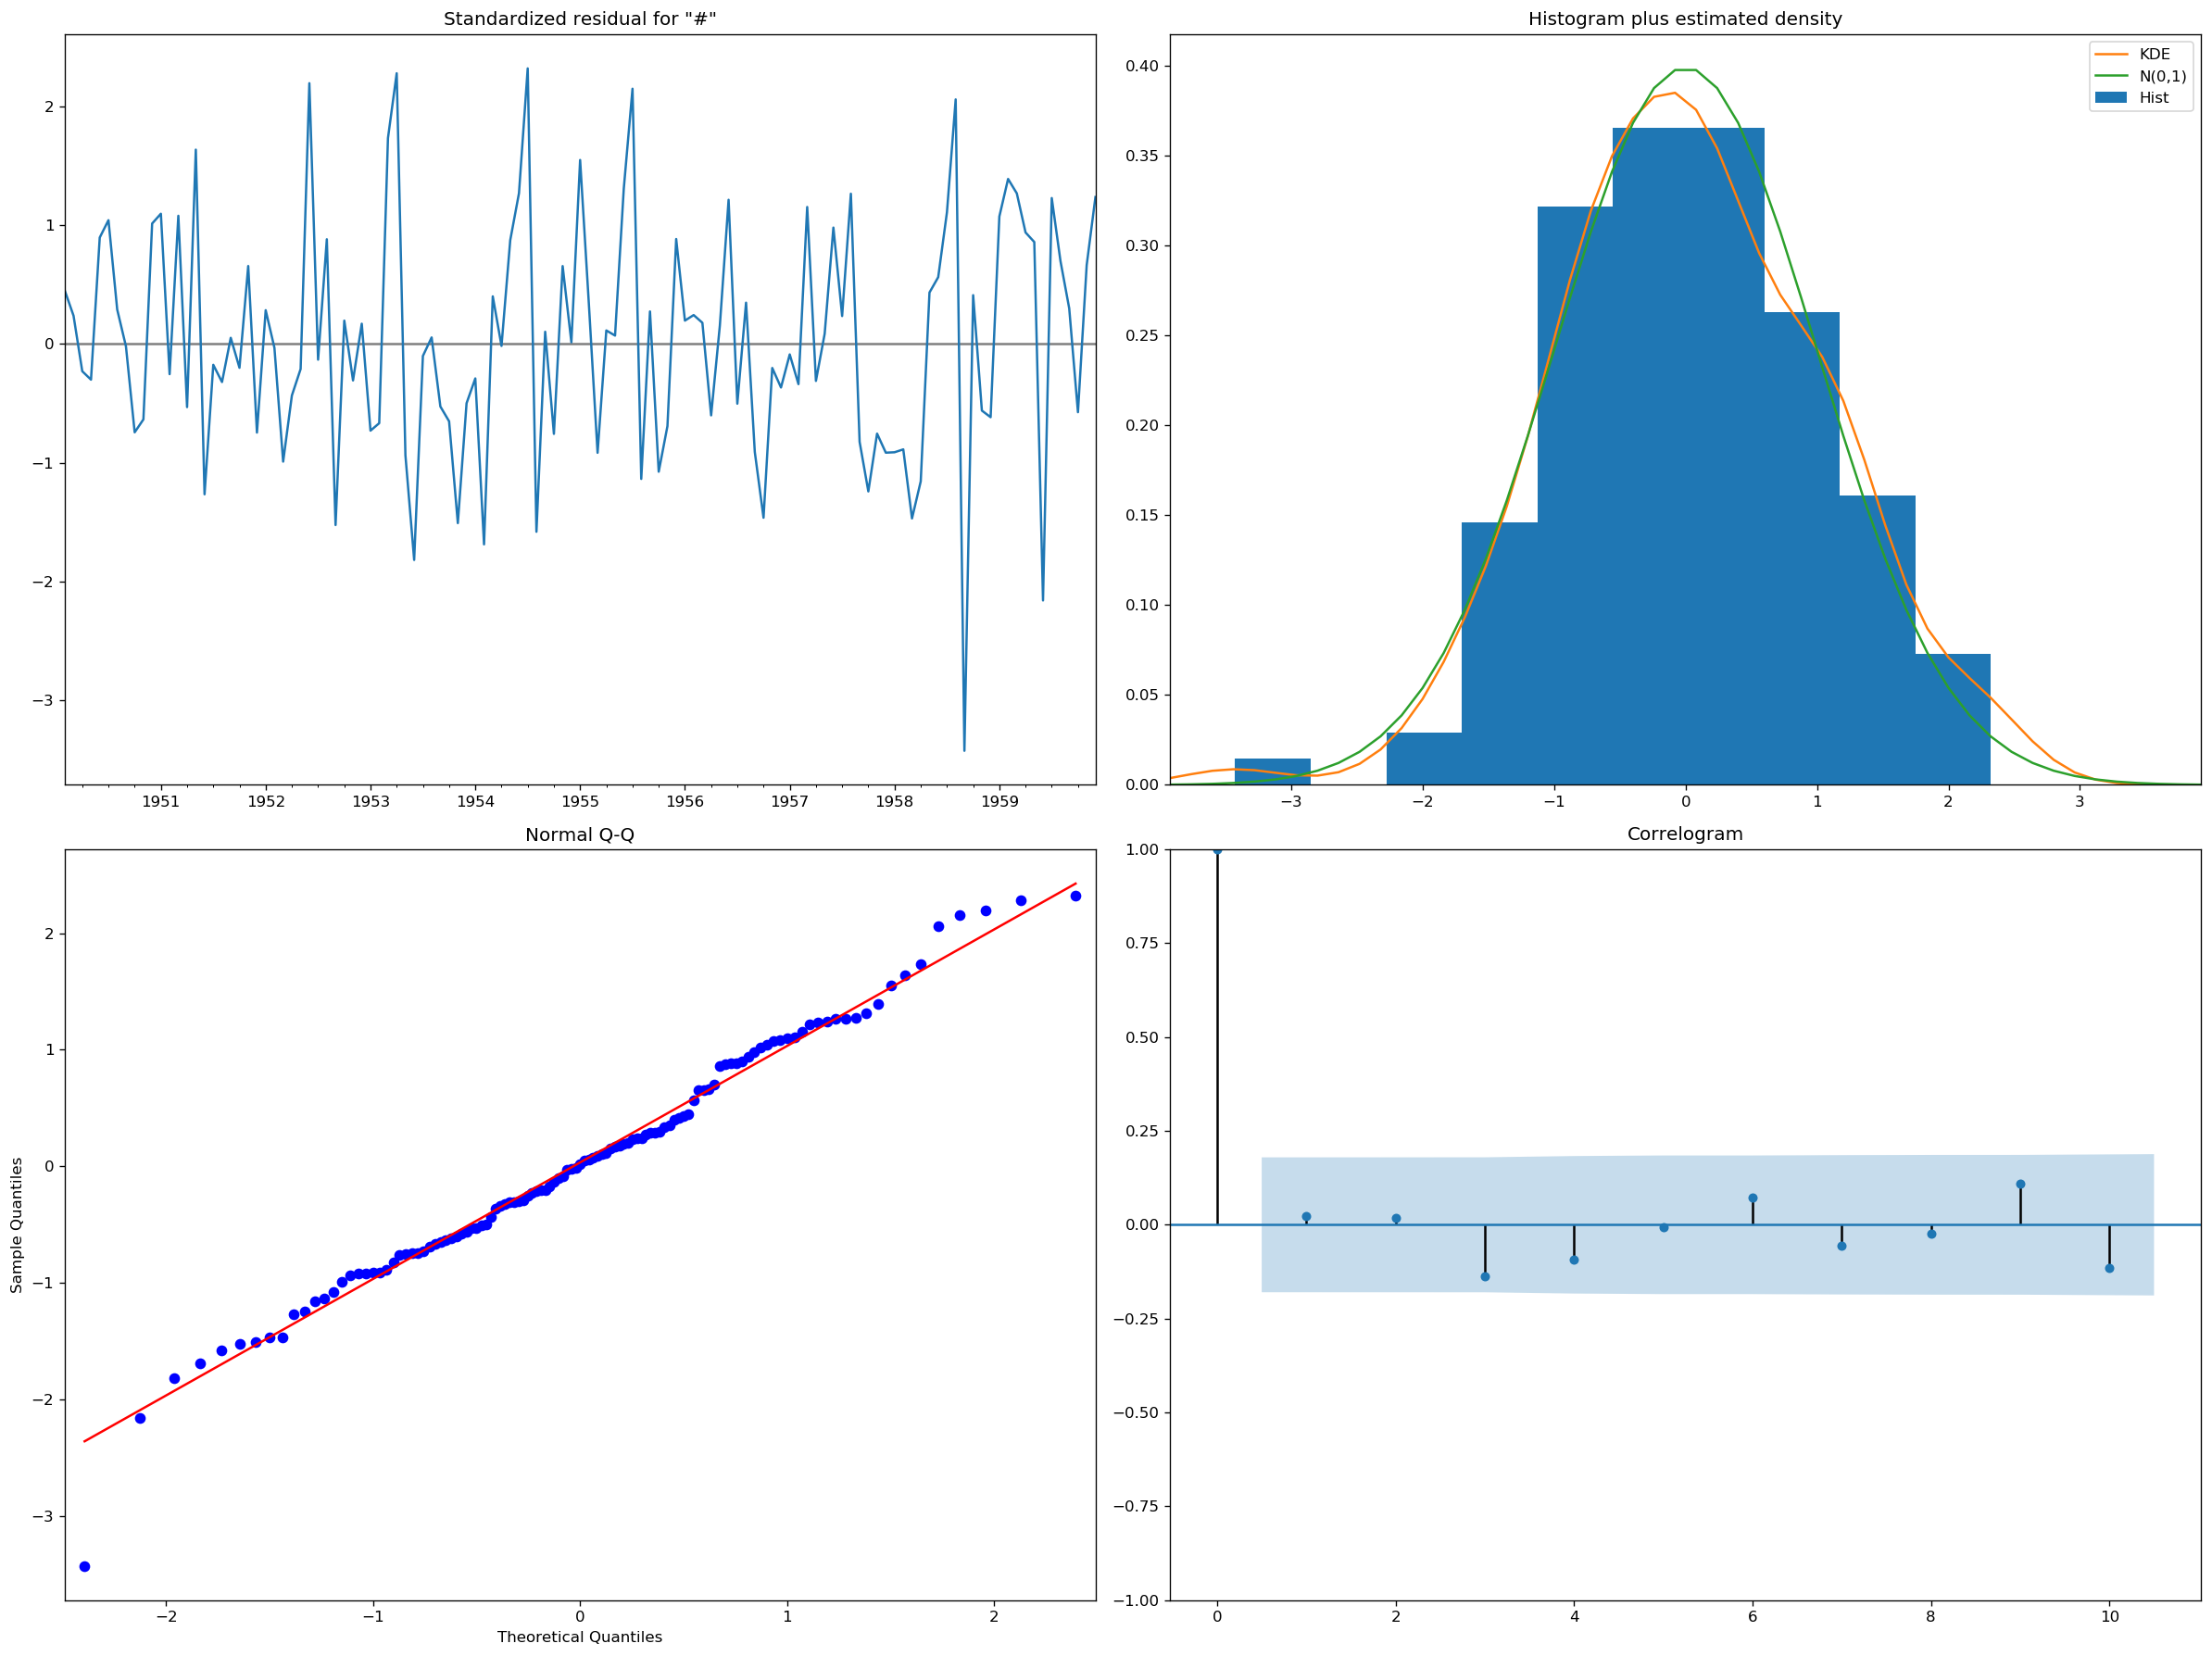

In [32]:
result.plot_diagnostics(figsize=(20,15))
plt.tight_layout();

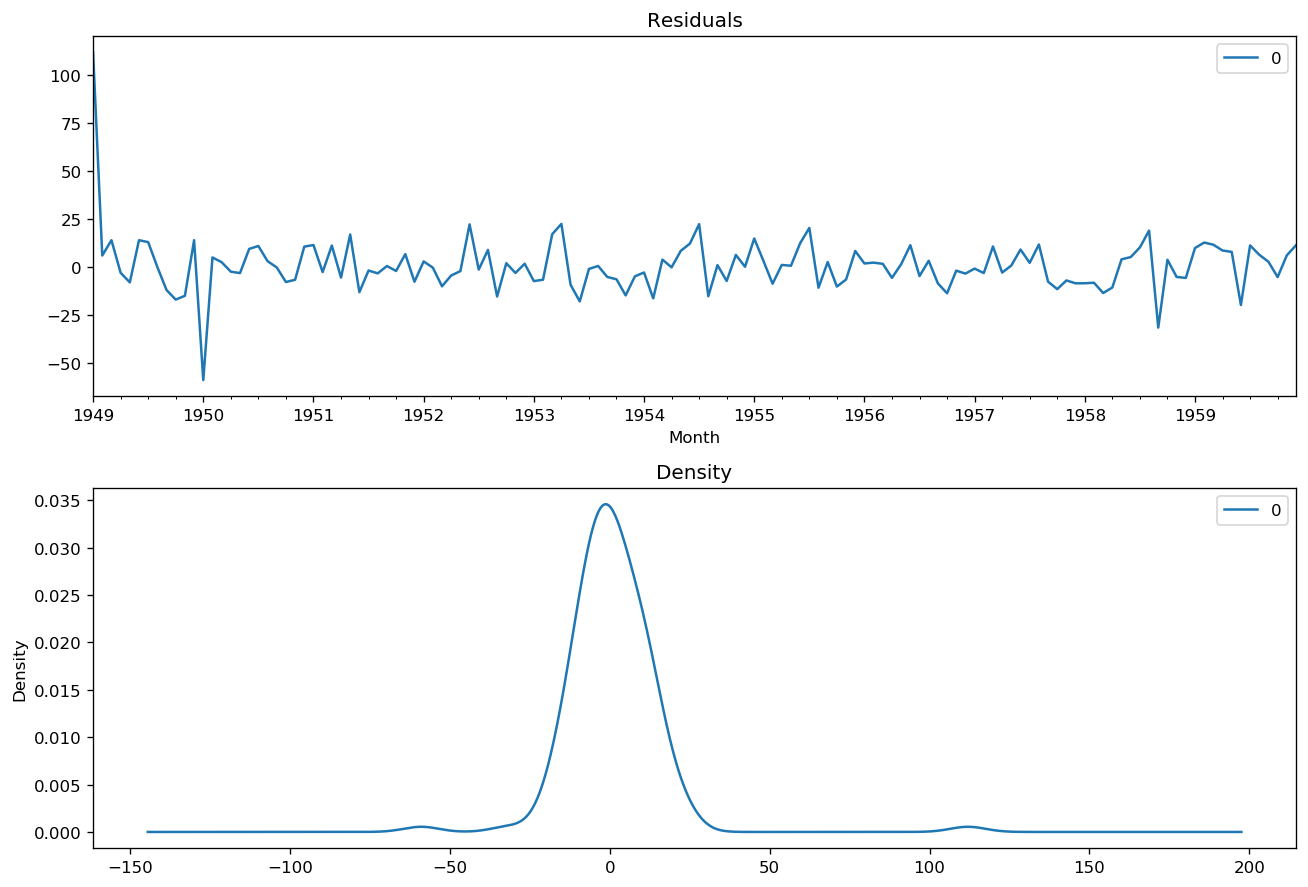

In [33]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

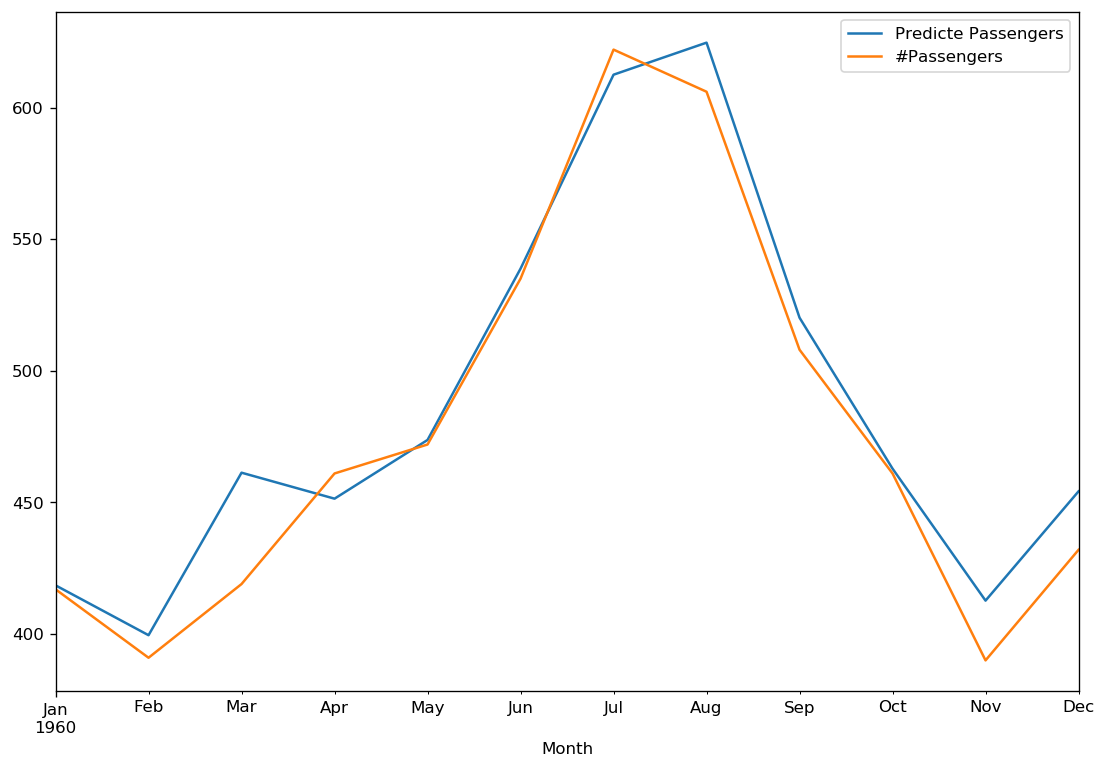

In [34]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions= result.predict(start, end, typ = 'levels').rename("Predicte Passengers")

# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 

In [35]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["#Passengers"], predictions) 

17.252895876972264

In [36]:
# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 

297.6624161416466

In [37]:
#Maximum absolute percentage error
mape = np.mean(np.abs(test["#Passengers"] - predictions) / np.abs(test["#Passengers"]))

print(f'MAPE: {round(mape * 100, 2)}%')

MAPE: 2.85%
